<a href="https://colab.research.google.com/github/M-Sravanthi/DLExercise1/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch Workflow

Lets expolre an example PyTorch end-to-end workflow.

Resource:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/docs/01_pytorch_workflow.ipynb
* Book version - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask questions here - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                         2: "build model",
                         3: "fitting the model to data (training)",
                         4: "making predictions and evaluating a model (inference)",
                         5: "saving and loading a model",
                         6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn ##nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

from typing import Text
### Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (eg: youtube, etc )
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

We will execute an example of the linear regression to test this.

We'll use a linear regression formula to make a straight line with known parameters.

Parameter is something that the model learns.

In [ ]:
# Create known parameters using y= mx + c
weight = 0.7 # weight = m
bias = 0.3   # bias = c

# Create
start = 0.0
end = 1.0
step = 0.02
X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most importatnt concepts in machine learning in general)

Let's create training and test data

In [ ]:
# Create a train teset split

train_split = int (0.8*len(X)) #Size of training dataset - 80% of dataset X
train_split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

# you can use scikit learn to bring some randomness into splitting

(40, 40, 10, 10)

# Visualize better

In [ ]:
def plot_prediction(train_data= X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  """
  Plots training data, test data and compares predictions.
  """

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s=4, label = "Training data")


  # PLot test data in green
  plt.scatter(test_data, test_labels, c="purple", s = 10, label = "Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});

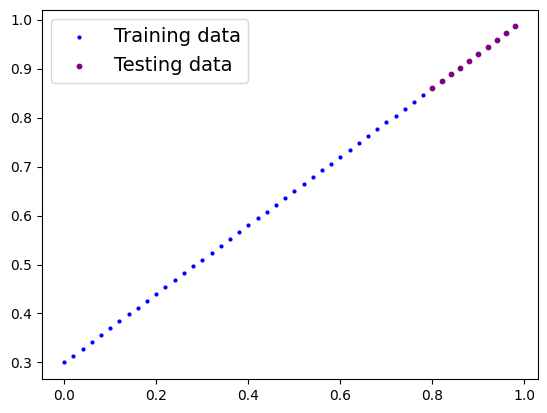

In [ ]:
plot_prediction();

### 2. Build Model

My first PyTorch Model

Building classes is very important - so being familiar with OOP is essential.

* Resource = https://realpython.com/python-classes/



##MOST IMPORTANT - GRADIENT DESCENT
What the linear regression model does ?
* Start with random values
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do that?
Through two main algorithms:
1. Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation -https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [ ]:
import torch
from torch import nn
# Create a linear regression model class

class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Module
# Must read nn.Module documentation in PyTorch
  def __init__(self):
    super().__init__()
    # Create weight and bias parameters using nn Model
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                             requires_grad=True,
                             dtype=torch.float))
  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor: #x is the input data - training data
    return self.weights * x + self.bias # this is the linear regression formula




### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph )
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules. If you subclass it you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

Resource: Pytorch cheat sheet - everything you need to create a working module is here.

### Checking the contents of our PyTorch model

The Linear regression model we created above - we will check out what parameters are in it.


In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_model()`

To check our model's predictive power, let's see how well it predicts y_test based on X_test.

When we pass data through our model, its going to run it through the forward() method.


In [ ]:
y_preds = model_0(X_test) #here it print out the grads coz requires_grad = True in the Linear regression model
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode(): # when you are trainging the model you need not keep track of grad - hence, we use inference mode- it skips the unnecessary computation
  y_preds = model_0(X_test)
y_preds, y_test

# inference mode is fairly new in PyTorch - previously they used torch.no_grad() instead of torch.inference_mode()

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

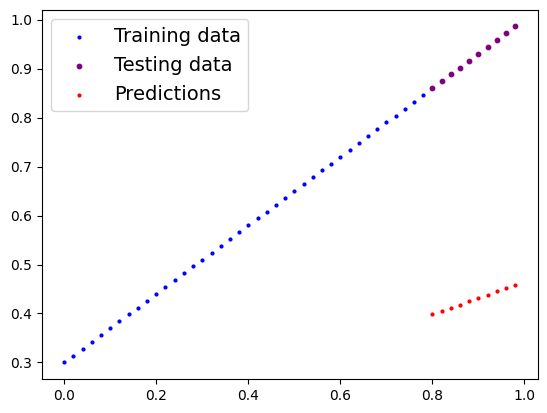

In [ ]:
plot_prediction(predictions = y_preds)

## 3. Train the model

The whole idea of training is for a model to move from some unknown parameters (theese may be random) to some known parameters.

OR from a poor representation of the data to a better representation of the data.

Onw way to measure how poor or how wrong your model's predictions are is to use a loss functions.

Things we need to train:

* Note: Loss function = Cost function
** Loss function: ** A function to measure how wrong your model's predictions are to the ideal result.
** Optimizer: ** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in this case) to imporve the loss function.



In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Which loss and optimizer function to use ?

This is decided only with experience and trial and error.
For regression - an L1Loss function and SGD optimizer works for the most part.

For Classification problems like identify a cat or a dog in the image - BCEclass entropy loss function generally works.

In [ ]:
# Set up loss function
loss_fn = nn.L1Loss()

#Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr = learning rate = possibly the most important hyperparameter you can get - you know what to set it to only through experience
# the learning rate is how big a step it will take in adjusting each of the parameters in each iteration to reduce the loss.


### Building a training loopd (and a testing loop) in PyTorch

What's in a trainging loop ?
1. Loop through the data -
2. Forward pass - involves data moving through out model's forward() to make predictions - also called a forward propagation
3. Calculate the loss (Compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backwards - moves backwards throught the network to calculate the gradients of each param according to loss
6. Optimizer step - use the optimizer to adjust our model's parameters to try and reduce the loss


In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data
epochs = 200

# Track the intermediate loss values
epoch_count = []
train_loss_values = []
test_loss_values = []


### Training
#1. Loop through the data
for epoch in range(epochs):
  #Set the model training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  #2. Forward pass
  y_pred = model_0(X_train)

  #3. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  #4. Optimizer zero grad
  optimizer.zero_grad()

  #5. Perform back propagation on the loss w.r.t parameters of the model
  loss.backward()

  #6. Step the optimizer (perform gradient descent)
  optimizer.step() #

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing

  with torch.inference_mode(): #turns off gradient tracking & few more things BTS
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate loss
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    #test_loss.append(test_loss.item())
    print(f"Epoch: {epoch} | tTraining Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())


Epoch: 0 | tTraining Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | tTraining Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | tTraining Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | tTraining Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | tTraining Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | tTraining Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | tTraining Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights

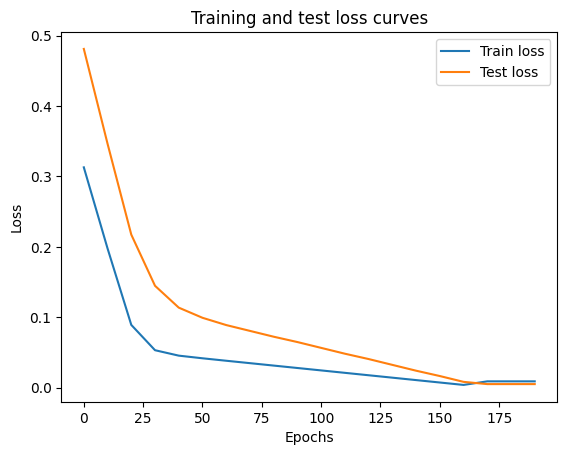

In [ ]:
import numpy as np
# Plot the loss curves

plt.plot(epoch_count, np.array(torch.tensor(train_loss_values)), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

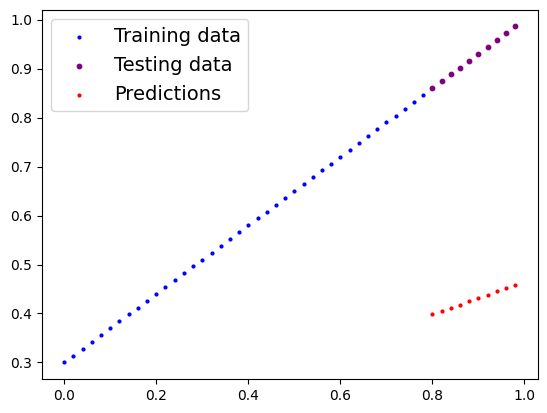

In [ ]:
plot_prediction(predictions = y_preds)

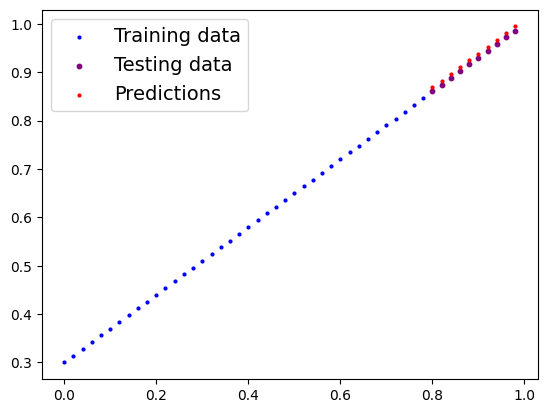

In [ ]:
plot_prediction(predictions = y_preds_new)

### Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch
1. `torch.save()` - allows you to save Pytorch object in Python's pickle format.
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary


In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH =  Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorchWorkflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict - the learned params
torch.save(obj = model_0.state_dict(),f = MODEL_SAVE_PATH)

## Loading a pytorch model

Since we saved our model's `state_dict()` rather than the entire model
we'll create a new instance of our model class and load the saved model into that.

In [ ]:
# To load a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
print(f"This will print the random initialised params not the learned params: {loaded_model_0.state_dict()}")
# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f"This will print the learned params: {loaded_model_0.state_dict()}")

This will print the random initialised params not the learned params: OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})
This will print the learned params: OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})


In [ ]:
# Make some predictions with our loaded model and check it with our model_0
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

print(f"Loaded model preds: {loaded_model_preds}")
# Print y_preds from model_0
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)

print(f"y preds: {y_preds}")

Loaded model preds: tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])
y preds: tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])


### 6 Putting it all together
Let's go back through the steps above and see it all in one place

In [ ]:
#import PyTorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

#check the Pytorch version
torch.__version__

'2.8.0+cu126'

Create device-agnostic code

This means if we've got access to a GPU, our code will use it as it will give faster computation else default to CPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device:  {device}")

Using device:  cuda


### 6.1 Recreate the above model using device agnostic code


In [ ]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02
#Create range values
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

#




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#Split the data into training and test

train_split = int((0.8)*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

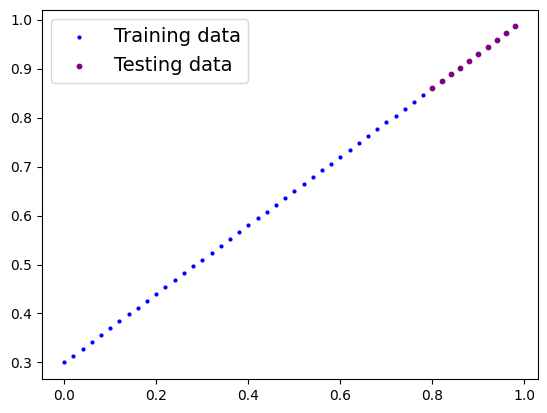

In [ ]:
# Plot the data

import matplotlib.pyplot as plt

plot_prediction(X_train,y_train, X_test, y_test)



In [ ]:
## Building a PyTorch linear model

import torch
from torch import nn
## this was the previous model
"""
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.parameters(torch.randn(1,
                                requires_grad = True,
                                dtype = torch.float))
    self.bias = nn.parameters(torch.randn(1,
                                requires_grad = True,
                                          dtype = torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.weight*x + self.bias
"""

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear module for creating the model parameters also called-
    # linear transform, probing layer, fully connected layer, dense layer
    #etc - it basically has the weight and bias params calculated as part of the nn.Linear algorithm and it can be used on data

    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

#Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#Check the model current device

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

###6.3 Training
For training we need:

* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Set the loss function
loss_fn = nn.L1Loss()

#Set the optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [ ]:
# Training loop
torch.manual_seed(42)

epochs = 200

#Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Calculate loss
  loss = loss_fn(y_pred,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. loss backward - back propagation
  loss.backward()

  #5. Optimiser step
  optimizer.step()

  ### Testing
  model_1.eval()

  #Forward pass
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}" )

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
model_1.to("cpu")
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

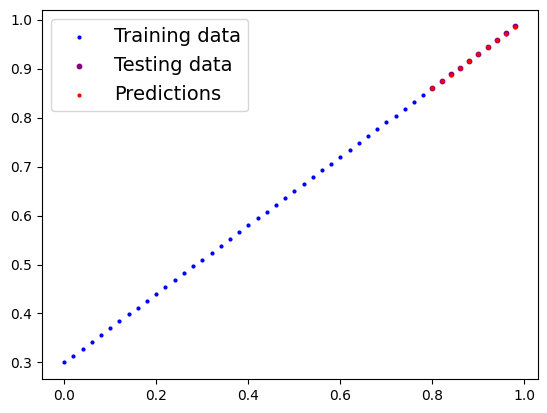

In [ ]:
# Turn model into evaluation model
model_1.eval()
with torch.inference_mode():
  y_pred2 = model_1(X_test.cpu())
plot_prediction(
    predictions =
    y_pred2.cpu()
)

###6.5 Saving and loading a trained model


In [ ]:
#Saving the model
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "01_PytorchWorkFlow_nnLinear.pth"
MODEL_SAVE_PATH = MODEL_PATH /MODEL_NAME

torch.save(obj = model_1.state_dict(), f=MODEL_SAVE_PATH)




In [ ]:
#Loading the model

loaded_model_1 = LinearRegressionModelV2() #initiate the new model
loaded_model_1.load_state_dict(torch.load(f = MODEL_SAVE_PATH)) #load the saved params
print(f"loaded model: {loaded_model_1.state_dict()}")



loaded model: OrderedDict({'linear_layer.weight': tensor([[0.6968]]), 'linear_layer.bias': tensor([0.3025])})


In [ ]:
#Checking if saved and loaded model are the same as the actual model

model_1.to(device)
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

loaded_model_1.to(device)
loaded_model_1.eval()
with torch.inference_mode():
  y_preds_loaded = loaded_model_1(X_test)

y_preds == y_preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')